In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('listings.csv')

In [3]:
def remove_sign(x,sign):
    if type(x) is str:
        x = float(x.replace(sign,'').replace(',',''))
    return x

Text(0, 0.5, 'Price ($)')

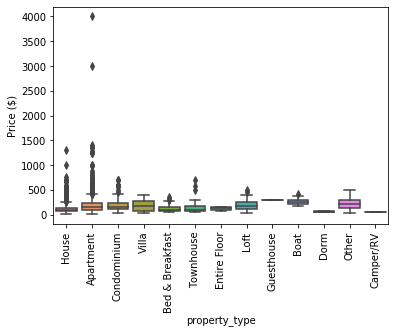

In [17]:
df=df[['price','property_type']]
df=pd.DataFrame(df)

df.price = df.price.apply(remove_sign,sign='$')
sns.boxplot(y='price', x='property_type',data=df)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [18]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

Text(0, 0.5, 'Price ($)')

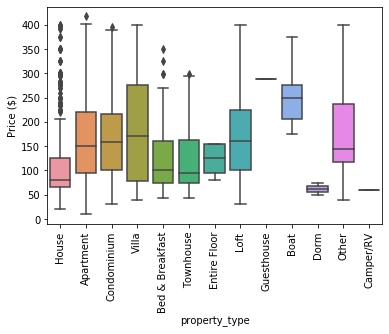

In [19]:
df_outlier_removed=remove_outlier_IQR(df.price)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
    
sns.boxplot(y='price', x='property_type',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [21]:
len(ind_diff)

124

In [128]:
def remove_outlier_Hampel(df):
    med=df.median()
    List=abs(df-med)
    cond=List.median()*4.5
    good_list=List[~(List>cond)]
    return good_list

In [129]:
df=pd.read_csv('listings.csv')

In [130]:
df.price = df.price.apply(remove_sign,sign='$')


Text(0, 0.5, 'Price ($)')

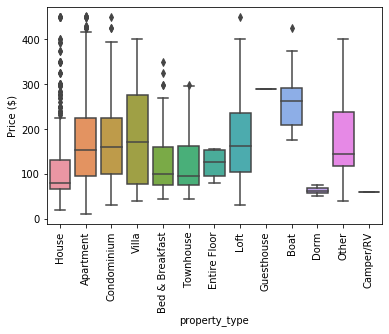

In [26]:
df_outlier_removed=remove_outlier_Hampel(df.price)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
    
sns.boxplot(y='price', x='property_type',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [28]:
len(ind_diff)

95

In [381]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [409]:
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [410]:
df=pd.read_csv('listings.csv')
df.price = df.price.apply(remove_sign,sign='$')

In [411]:
clusters=remove_outliers_DBSCAN((df['price']),0.5,5)
clusters.value_counts().sort_values(ascending=False)

-1      384
 9      144
 21     117
 4      101
 0       95
       ... 
 81       6
 56       5
 82       5
 124      5
 8        5
Name: cluster, Length: 127, dtype: int64

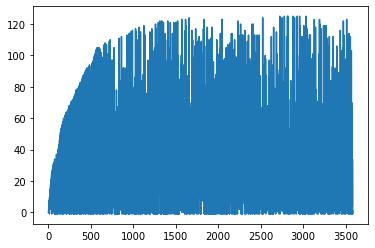

In [412]:
plt.plot(clusters)

In [413]:
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Int64Index([  12,   40,   70,   75,   81,   84,   96,   99,  100,  107,
            ...
            3501, 3529, 3532, 3539, 3550, 3552, 3565, 3572, 3576, 3582],
           dtype='int64', length=384)

Text(0, 0.5, 'Price ($)')

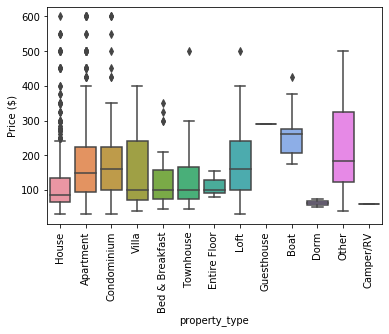

In [414]:
for i in range(0, len(ind_outlier),1):
    df_final=df.drop([ind_outlier[i]])
    df=df_final
    
sns.boxplot(y='price', x='property_type',data=df_final)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [415]:
len(ind_outlier)

384

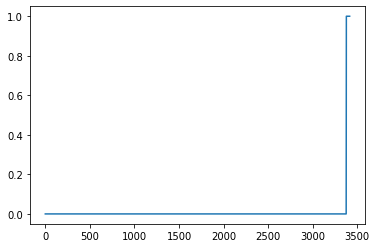

In [287]:
neigh = NearestNeighbors(n_neighbors=3)
a=df.price.values.reshape(-1,1)
nbrs = neigh.fit(a)
distances, indices = nbrs.kneighbors(a)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [358]:
iris=pd.read_csv("Iris.csv")

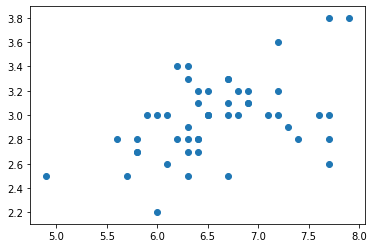

In [371]:
df=iris[iris['Species']=='Iris-virginica']
x=df['SepalLengthCm']
y=df['SepalWidthCm']
plt.scatter(x,y)

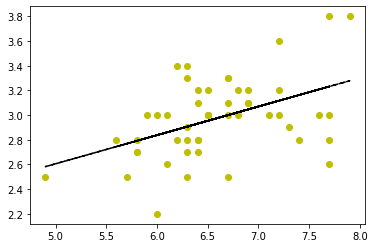

In [369]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')


In [ ]:
x=x.append(pd.Series([20]))
y=y.append(pd.Series([6.08]))

In [416]:
coef

array([0.23161465, 1.44811456])

In [374]:
20*0.23189+1.446

6.0838

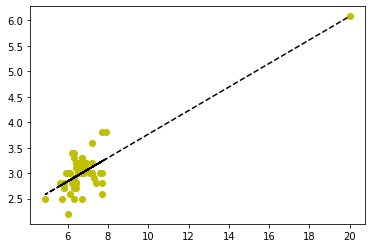

In [380]:
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')